In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
# Load dataset
file_path = "C:\\Users\\Asus\\Desktop\\House Price data\\Housing.csv"  # Update with your correct file path
df = pd.read_csv(file_path)

In [6]:
# Display dataset info
print(df.info())  # Check for missing values & data types
print(df.head())  # Display first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

In [7]:
# Encode categorical variables
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le

In [8]:
# Feature Engineering
df['price_per_sqft'] = df['price'] / df['area']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [9]:
# Drop the 'stories' column (low correlation with price)
df.drop(columns=['stories'], inplace=True)


In [10]:
# Define features (X) and target variable (y)
X = df.drop(columns=["price"])
y = df["price"]

In [11]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Apply Polynomial Features (Optional)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [14]:
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

In [15]:
# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all CPU cores
)

In [16]:
# Fit Grid Search to find best parameters
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

In [17]:
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)


In [18]:
print("\n🔥 Optimized Model Performance 🔥")
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"📉 Mean Absolute Error (MAE): ₹{mae_best:,.2f}")
print(f"📉 Root Mean Squared Error (RMSE): ₹{rmse_best:,.2f}")
print(f"📈 R² Score: {r2_best:.4f}")


🔥 Optimized Model Performance 🔥
✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📉 Mean Absolute Error (MAE): ₹488,603.03
📉 Root Mean Squared Error (RMSE): ₹860,910.91
📈 R² Score: 0.8534


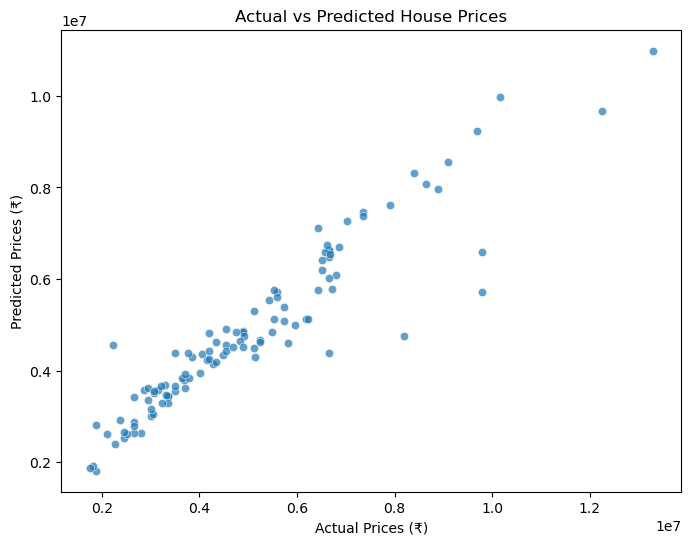

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7)
plt.xlabel("Actual Prices (₹)")
plt.ylabel("Predicted Prices (₹)")
plt.title("Actual vs Predicted House Prices")
plt.show()